# This program reads RSP LUT and generates images of various sizes
# for various variables to test as inputs into a CNN framework

In [1]:
# import neccesary modules for this module
#-------------------------------------------
import pandas as pd
import numpy as np
import scipy as sio
import scipy.stats as stats
import netCDF4 as nc4
import matplotlib 
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib import cm
from matplotlib.collections import LineCollection
from matplotlib.patches import Polygon
from matplotlib.patches import Polygon
from mpl_toolkits.basemap import Basemap
from mpl_toolkits.axes_grid1 import make_axes_locatable
import shapefile
%matplotlib inline

In [2]:
## read netcdf parameters from LUT or measurements files
## nc_file is full file path, 
## e.g. filepath = '..//..//py_data//oracles_NN//training//NNcld_20150911_20160102_20160420_nonoise.nc'
## varname is netcdf variable name string in file, e.g. "ref_i"
##--------------------------------------------------------------

def read_nc_file( nc_file, varname ):
    f = nc4.Dataset(nc_file)
    data = f.variables[varname]
    #f.close()
    return data;

In [3]:
## cat netcdf parameters from LUT or measurements files
## to create dataframe in pandas, 
## colname is column name to change from default
## this version is based on create_df_from_nc
## but reads and saves the 3D arrays in a way that is 
## suites for CNN input
##-----------------------------------------------------

def create_df_from_nc4CNN( nc_data, colname ):
    df = pd.DataFrame([])
    # check data size and length 
    l = len(nc_data.shape)
    vza = np.arange(24,125)
    # if l=3 cat dataframe, if l=1 save var as df
    if   l==3:
        # wavelength is the 2nd dim
        for i in range(nc_data.shape[2]):
            tmp = pd.DataFrame(np.transpose(nc_data[vza,:,i]))# only VZA -40 to 40
            # print tmp.shape; this has size of 7x101
            if (i==0):
                out = tmp
                print out.shape
            else:
                # stack all 2D arrays into a multidimentional array
                out = np.dstack((out, tmp))
                
    elif l==2:
            tmp = pd.DataFrame(np.transpose(nc_data[3,:])) # 3 is the VZA index (all rows suppose to be similar)
            df=df.append(pd.DataFrame(tmp))
            # rename column name
            df.rename(columns=lambda x: colname, inplace=True)
            out = []
    elif l==1:
            df=df.append(pd.DataFrame(nc_data[:]))
            # rename column name
            df.rename(columns=lambda x: colname, inplace=True)
            out = []
    return df, out;

In [4]:
# test df shape for ref_i/ref_q
# this is synthetic LUT
filepath = '..//..//py_data//oracles_NN//simulated_files//NN_clouds_20170505_PP_cut_good.nc'
data = read_nc_file( nc_file=filepath, varname="ref_i" )
data.shape
df = pd.DataFrame([])
# check data size and length 
l = len(data.shape)
print l
vza = np.arange(24,125)
for i in range(data.shape[2]):
        tmp = pd.DataFrame(np.transpose(data[vza,:,i]))# only VZA -40 to 40
        # print tmp.shape; this has size of 7x101
        if (i==0):
            out = tmp
            print out.shape
        else:
            # stack all 2D arrays into a multidimentional array
            out = np.dstack((out, tmp))
tmp.head()
out.shape

3
(7, 101)


(7L, 101L, 20736L)

In [5]:
# plot ref_i "images"
#---------------------
#lam = np.array(range(out.shape[0]))
#lam += 1
#lam
#vza = np.array(range(out.shape[1]))
#vza += 1
#vza
#xx, yy = np.meshgrid(vza, lam)
#fig, axes = plt.subplots(1,4)
#plt0 = axes[0]
#plt.figure()
#plt0.scatter(xx,yy,c=out[:,:,0],cmap=plt.cm.gist_ncar)
#plt0.pcolormesh(xx, yy, out[:,:,0], cmap=plt.cm.gist_ncar, vmin=0, vmax=1)
#divider0 = make_axes_locatable(axes[0])
#cax0 = divider0.append_axes("bottom", size="5%", pad=0.05)
#plt.colorbar(plt0, ticks=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0],cax=cax0, orientation='horizontal')
   
#plt1 = axes[1]
#plt1.pcolormesh(xx, yy, out[:,:,100], cmap=plt.cm.gist_ncar, vmin=0, vmax=1)
#plt2 = axes[2]
#plt2.pcolormesh(xx, yy, out[:,:,1000], cmap=plt.cm.gist_ncar, vmin=0, vmax=1)
#plt3 = axes[3]
#plt3.pcolormesh(xx, yy, out[:,:,10000], cmap=plt.cm.gist_ncar, vmin=0, vmax=1)
#fig.colorbar
#divider = make_axes_locatable(axes[3])
#cax = divider.append_axes("right", size="5%", pad=0.05)
#cbar = plt.colorbar(plt3, ticks=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0],cax=axes[3], orientation='vertical')

In [21]:
# upload simulated data for plotting
#------------------------------------
# filepath = '..//..//py_data//oracles_NN//simulated_files//NN_clouds_20170505_PP_cut_good.nc'#no_noise data
filepath = '..//..//py_data//oracles_NN//simulated_files//NN_clouds_20170505_PP_10_0000_0_90_cut.nc'
ref_i = read_nc_file( nc_file=filepath, varname="ref_i" )
print ref_i.shape
df_ref_i, out_ref_i = create_df_from_nc4CNN( ref_i, colname="ref_i" )
cod = read_nc_file( nc_file=filepath, varname="cod" )
cod_df, out = create_df_from_nc4CNN( cod, colname="COT" )
print cod_df.shape
ref = read_nc_file( nc_file=filepath, varname="sizea" )
ref_df, out = create_df_from_nc4CNN( ref, colname="REF" )
print ref_df.shape
vef = read_nc_file( nc_file=filepath, varname="sizeb" )
vef_df, out = create_df_from_nc4CNN( vef, colname="VEF" )
print vef_df.shape


(152, 7, 20736)
(7, 101)
(20736, 1)
(20736, 1)
(20736, 1)


In [7]:
cod_df.head
cod_df.loc[0]
# data_df.ix[:,:].values
'COT=' + str(cod_df.values[0]) + ', Reff=' + str(ref_df.values[0]) + ', Veff=' + str(vef_df.values[0])
out_ref_i.shape

(7L, 101L, 20736L)

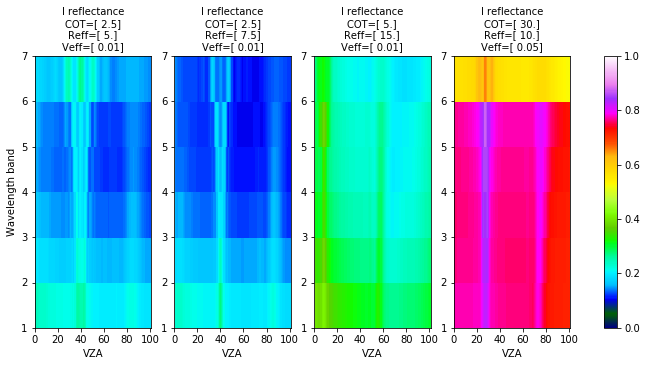

In [8]:
# plot ref_i with case as title
#-------------------------------
lam = np.array(range(out_ref_i.shape[0]))
lam += 1
lam
vza = np.array(range(out_ref_i.shape[1]))
vza += 1
vza
xx, yy = np.meshgrid(vza, lam)
fig, axes = plt.subplots(nrows=1, ncols=4,figsize=(12,5))
samp = np.array([0,100,1000,10000])
#samp[0]
i = -1
for ax in axes.flat:
    i+=1
    im = ax.pcolormesh(xx, yy, out_ref_i[:,:,samp[i]], cmap=plt.cm.gist_ncar, vmin=0, vmax=1)
    axes[i].set_xticks([0,20,40,60,80,100])
    axes[i].set_xlabel('VZA')
    tit = 'I reflectance' + '\nCOT=' + str(cod_df.values[samp[i]]) + '\nReff=' + str(ref_df.values[samp[i]]) + '\nVeff=' + str(vef_df.values[samp[i]])
    axes[i].set_title(tit, fontsize=10)
    
fig.colorbar(im, ax=axes.ravel().tolist())
axes[0].set_ylabel('Wavelength band')
plt.show()
# save figure
# as png
fi1 = '../../py_figs/oracles_NN/' + 'no_noise' + '_I_reflectance_sample.png'
#fig = matplotlib.pyplot.gcf()
#fig.set_size_inches(13, 9, forward=True)
fig.savefig(fi1, bbox_inches='tight',dpi=1000)

In [96]:
# this is measurement
# test read_nc_file for training
filepath = '..//..//py_data//oracles_NN//measurements//RSP2-ER2_L1B-RSPGEOL1B-GeolocatedRadiances_20160912T123215Z_V001-20160913T184158Z_NN.nc'
data = read_nc_file( nc_file=filepath, varname="ref_i" )
data.shape

(152, 7, 3701)

In [13]:
# upload measurement data for plotting
#------------------------------------
filepath = '..//..//py_data//oracles_NN//measurements//RSP2-ER2_L1B-RSPGEOL1B-GeolocatedRadiances_20160912T123215Z_V001-20160913T184158Z_NN.nc'
ref_i_meas = read_nc_file( nc_file=filepath, varname="ref_i" )
print ref_i_meas.shape
df_ref_i_meas, out_ref_i_meas = create_df_from_nc4CNN( ref_i_meas, colname="ref_i" )
utc = read_nc_file( nc_file=filepath, varname="utc_hour" )
utc_df, out = create_df_from_nc4CNN( utc, colname="UTC_hour" )
print utc_df.shape
print utc_df.head()

(152, 7, 3701)
(7, 101)
(3701, 1)
    UTC_hour
0  12.607610
1  12.607844
2  12.608078
3  12.608311
4  12.608545


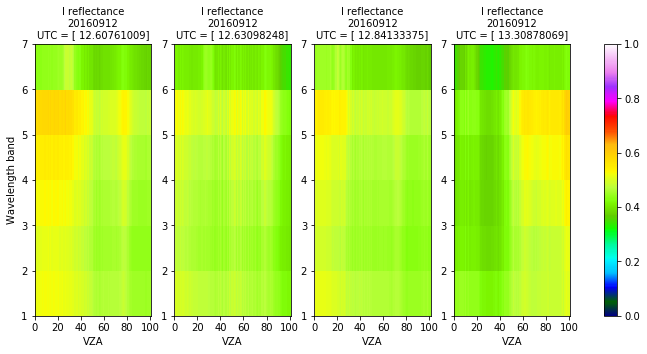

In [45]:
# plot ref_i with case as title
#-------------------------------

fig, axes = plt.subplots(nrows=1, ncols=4,figsize=(12,5))
samp = np.array([0,100,1000,3000])
#samp[0]
i = -1
for ax in axes.flat:
    i+=1
    im = ax.pcolormesh(xx, yy, out_ref_i_meas[:,:,samp[i]], cmap=plt.cm.gist_ncar, vmin=0, vmax=1)
    axes[i].set_xticks([0,20,40,60,80,100])
    axes[i].set_xlabel('VZA')
    tit = 'I reflectance' + '\n20160912' + '\nUTC = ' + str(utc_df.values[samp[i]])
    axes[i].set_title(tit, fontsize=10)
    
fig.colorbar(im, ax=axes.ravel().tolist())
axes[0].set_ylabel('Wavelength band')
plt.show()
# save figure
# as png
fi1 = '../../py_figs/oracles_NN/' + '20160912' + '_I_reflectance_sample.png'
#fig = matplotlib.pyplot.gcf()
#fig.set_size_inches(13, 9, forward=True)
fig.savefig(fi1, bbox_inches='tight',dpi=1000)

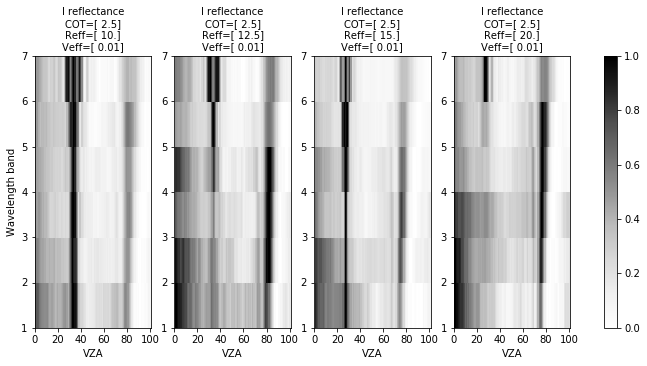

In [22]:
# plot ref_i with case as title
#-------------------------------
# this is original LUT
# normalize:
#-----------
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
    
# normalize (0-1)
out_ref_i_norm = out_ref_i
for i in range(out_ref_i.shape[2]):
    min_max_scaler         = MinMaxScaler().fit(out_ref_i[:,:,i].T)
    out_ref_i_norm[:,:,i]  = min_max_scaler.fit_transform(out_ref_i[:,:,i].T).T
    

lam = np.array(range(out_ref_i.shape[0]))
lam += 1
lam
vza = np.array(range(out_ref_i.shape[1]))
vza += 1
vza
xx, yy = np.meshgrid(vza, lam)
fig, axes = plt.subplots(nrows=1, ncols=4,figsize=(12,5))
samp = np.array([0,100,1000,10000])
samp = np.array([200,300,400,500])
#samp[0]
i = -1
for ax in axes.flat:
    i+=1
    im = ax.pcolormesh(xx, yy, out_ref_i_norm[:,:,samp[i]], cmap="Greys", vmin=0, vmax=1)
    axes[i].set_xticks([0,20,40,60,80,100])
    axes[i].set_xlabel('VZA')
    tit = 'I reflectance' + '\nCOT=' + str(cod_df.values[samp[i]]) + '\nReff=' + str(ref_df.values[samp[i]]) + '\nVeff=' + str(vef_df.values[samp[i]])
    axes[i].set_title(tit, fontsize=10)
    
fig.colorbar(im, ax=axes.ravel().tolist())
axes[0].set_ylabel('Wavelength band')
plt.show()
# save figure
# as png
fi1 = '../../py_figs/oracles_NN/' + 'no_noise' + '_I_reflectance_norm_t_sample.png'
fi1 = '../../py_figs/oracles_NN/' + 'no_noise' + '_I_reflectance_norm_t_sample_greyscale_sameCOD.png'
fi1 = '../../py_figs/oracles_NN/' + 'ro_090' + '_I_reflectance_norm_t_sample_greyscale_sameCOD.png'
#fig = matplotlib.pyplot.gcf()
#fig.set_size_inches(13, 9, forward=True)
fig.savefig(fi1, bbox_inches='tight',dpi=1000)

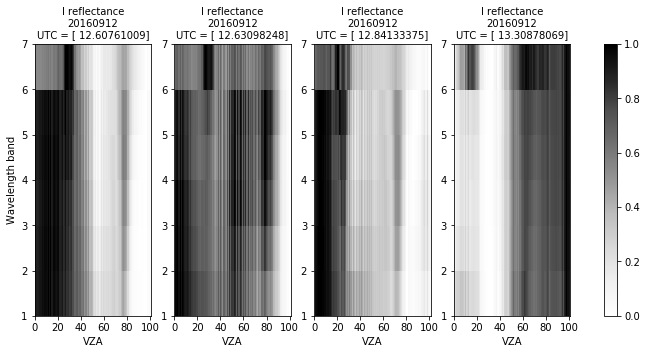

In [15]:
# plot ref_i with case as title
#-------------------------------
# this is measurements
# normalize:
#-----------
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
    
# normalize (0-1)
out_ref_i_norm_meas = out_ref_i_meas
for i in range(out_ref_i_meas.shape[2]):
    min_max_scaler         = MinMaxScaler().fit(out_ref_i_meas[:,:,i].T)
    out_ref_i_norm_meas[:,:,i]  = min_max_scaler.fit_transform(out_ref_i_meas[:,:,i].T).T

fig, axes = plt.subplots(nrows=1, ncols=4,figsize=(12,5))
samp = np.array([0,100,1000,3000])
#samp[0]
i = -1
for ax in axes.flat:
    i+=1
    im = ax.pcolormesh(xx, yy, out_ref_i_norm_meas[:,:,samp[i]], cmap="Greys", vmin=0, vmax=1)
    axes[i].set_xticks([0,20,40,60,80,100])
    axes[i].set_xlabel('VZA')
    tit = 'I reflectance' + '\n20160912' + '\nUTC = ' + str(utc_df.values[samp[i]])
    axes[i].set_title(tit, fontsize=10)
    
fig.colorbar(im, ax=axes.ravel().tolist())
axes[0].set_ylabel('Wavelength band')
plt.show()
# save figure
# as png
fi1 = '../../py_figs/oracles_NN/' + '20160912' + '_I_reflectance_norm_t_sample.png'
fi1 = '../../py_figs/oracles_NN/' + '20160912' + '_I_reflectance_norm_t_sample_greyscale.png'
#fig = matplotlib.pyplot.gcf()
#fig.set_size_inches(13, 9, forward=True)
fig.savefig(fi1, bbox_inches='tight',dpi=1000)

In [17]:
# upload simulated ref_q data for plotting
#-------------------------------------------
filepath = '..//..//py_data//oracles_NN//simulated_files//NN_clouds_20170505_PP_cut_good.nc'
ref_q = read_nc_file( nc_file=filepath, varname="ref_q" )
print ref_q.shape
df_ref_q, out_ref_q = create_df_from_nc4CNN( ref_q, colname="ref_q" )
cod = read_nc_file( nc_file=filepath, varname="cod" )
cod_df, out = create_df_from_nc4CNN( cod, colname="COT" )
print cod_df.shape
ref = read_nc_file( nc_file=filepath, varname="sizea" )
ref_df, out = create_df_from_nc4CNN( ref, colname="REF" )
print ref_df.shape
vef = read_nc_file( nc_file=filepath, varname="sizeb" )
vef_df, out = create_df_from_nc4CNN( vef, colname="VEF" )
print vef_df.shape

(152, 7, 20736)
(7, 101)
(20736, 1)
(20736, 1)
(20736, 1)


..//..//py_data//oracles_NN//simulated_files//NN_clouds_20170505_PP_cut_good.nc


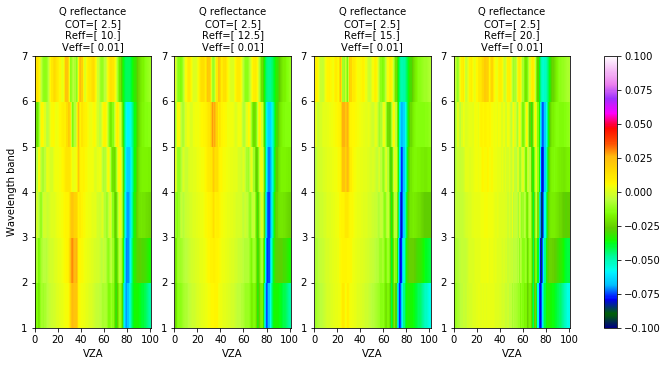

In [19]:
# plot ref_q with case as title
#-------------------------------
print filepath
fig, axes = plt.subplots(nrows=1, ncols=4,figsize=(12,5))
samp = np.array([200,300,400,500])
#samp[0]
i = -1
for ax in axes.flat:
    i+=1
    im = ax.pcolormesh(xx, yy, out_ref_q[:,:,samp[i]], cmap=plt.cm.gist_ncar, vmin=-0.1, vmax=0.1)
    axes[i].set_xticks([0,20,40,60,80,100])
    axes[i].set_xlabel('VZA')
    tit = 'Q reflectance' + '\nCOT=' + str(cod_df.values[samp[i]]) + '\nReff=' + str(ref_df.values[samp[i]]) + '\nVeff=' + str(vef_df.values[samp[i]])
    axes[i].set_title(tit, fontsize=10)
    
fig.colorbar(im, ax=axes.ravel().tolist())
axes[0].set_ylabel('Wavelength band')
plt.show()
# save figure
# as png
fi1 = '../../py_figs/oracles_NN/' + 'no_noise' + '_Q_reflectance_sample.png'
#fig = matplotlib.pyplot.gcf()
#fig.set_size_inches(13, 9, forward=True)
fig.savefig(fi1, bbox_inches='tight',dpi=1000)

(7L, 101L, 20736L)


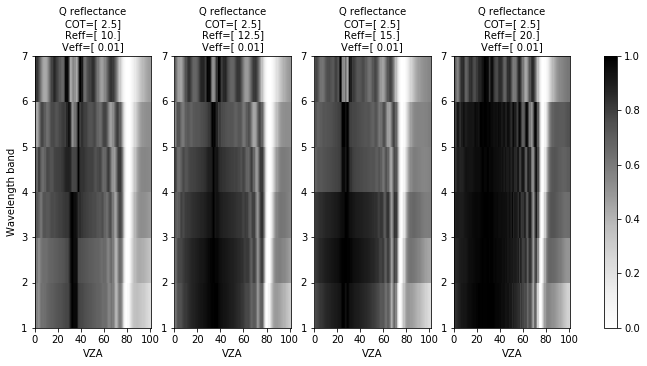

In [20]:
# plot ref_q with case as title
# normalized data
#-------------------------------
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from numpy import *

print out_ref_q.shape
# standartize 
#out_ref_q_std = out_ref_q
#for q in range(out_ref_q.shape[2]):
#    std_scale             = StandardScaler().fit(out_ref_q[:,:,q])
#    out_ref_q_std[:,:,q]  = std_scale.fit_transform(out_ref_q[:,:,q])
    
# normalize (0-1)
out_ref_q_norm = out_ref_q
for q in range(out_ref_q.shape[2]):
    min_max_scaler         = MinMaxScaler().fit(out_ref_q[:,:,q].T)
    out_ref_q_norm[:,:,q]  = min_max_scaler.fit_transform(out_ref_q[:,:,q].T).T
    
# normalize (0-1) - along each wavelength (scale across columns of VZA)
#out_ref_q_norm = out_ref_q

#print np.dstack((out_ref_q[:,:,1].min(axis=1), ) * out_ref_q.shape[1]).shape
#print np.squeeze(np.dstack((out_ref_q[:,:,100].min(axis=1), ) * out_ref_q.shape[1])).shape
#print np.squeeze(np.dstack((out_ref_q[:,:,100].min(axis=1), ) * out_ref_q.shape[1]))[0:2,0:2]
#print np.squeeze(np.dstack((out_ref_q[:,:,100].max(axis=1), ) * out_ref_q.shape[1])).shape
#print np.squeeze(np.dstack((out_ref_q[:,:,100].max(axis=1), ) * out_ref_q.shape[1]))[0:2,0:2]
#print out_ref_q[:,:,100].shape
#qmin = np.dstack((out_ref_q[:,:,100].min(axis=1), ) * out_ref_q.shape[1]).squeeze
#qmax = np.dstack((out_ref_q[:,:,100].max(axis=1), ) * out_ref_q.shape[1]).squeeze
#print 'out_ref_q shape'
#print out_ref_q[:,:,100].shape
#print np.array(qmin)
#test   = (out_ref_q[:,:,100] - np.array(qmin))
#print test.shape
#q = (qmax - qmin)
#print q.shape
#for q in range(out_ref_q.shape[2]):
#    qmin = np.dstack((out_ref_q[:,:,q].min(axis=1), ) * out_ref_q.shape[1]).squeeze
#    qmax = np.dstack((out_ref_q[:,:,q].max(axis=1), ) * out_ref_q.shape[1]).squeeze
#    out_ref_q_norm[:,:,q]   = (out_ref_q[:,:,q] - qmin)/(qmax - qmin)


fig, axes = plt.subplots(nrows=1, ncols=4,figsize=(12,5))
samp = np.array([200,300,400,500])
#samp[0]
i = -1
for ax in axes.flat:
    i+=1
    #im = ax.pcolormesh(xx, yy, out_ref_q_norm[:,:,samp[i]], cmap=plt.cm.gist_ncar, vmin=0, vmax=1)
    im = ax.pcolormesh(xx, yy, out_ref_q_norm[:,:,samp[i]], cmap="Greys", vmin=0, vmax=1)
    axes[i].set_xticks([0,20,40,60,80,100])
    axes[i].set_xlabel('VZA')
    tit = 'Q reflectance' + '\nCOT=' + str(cod_df.values[samp[i]]) + '\nReff=' + str(ref_df.values[samp[i]]) + '\nVeff=' + str(vef_df.values[samp[i]])
    axes[i].set_title(tit, fontsize=10)
    
fig.colorbar(im, ax=axes.ravel().tolist())
axes[0].set_ylabel('Wavelength band')
plt.show()
# save figure
# as png
#fi1 = '../../py_figs/oracles_NN/' + 'no_noise' + '_Q_reflectance_0_1_normalized_sample.png'
fi1 = '../../py_figs/oracles_NN/' + 'no_noise' + '_Q_reflectance_norm_t_sample.png'
fi1 = '../../py_figs/oracles_NN/' + 'no_noise' + '_Q_reflectance_norm_t_sample_greyscale.png'
#fig = matplotlib.pyplot.gcf()
#fig.set_size_inches(13, 9, forward=True)
fig.savefig(fi1, bbox_inches='tight',dpi=1000)

In [4]:
# upload simulated data for plotting dolp
#-----------------------------------------
# filepath = '..//..//py_data//oracles_NN//simulated_files//NN_clouds_20170505_PP_cut_good.nc'#no_noise data
filepath = '..//..//py_data//oracles_NN//simulated_files//NN_clouds_20170505_PP_10_0000_0_90_cut.nc'
ref_i = read_nc_file( nc_file=filepath, varname="ref_i" )
ref_q = read_nc_file( nc_file=filepath, varname="ref_q" )

print ref_i.shape
print ref_q.shape
# ref_i
df_ref_i, out_ref_i = create_df_from_nc4CNN( ref_i, colname="ref_i" )
# ref_q
df_ref_q, out_ref_q = create_df_from_nc4CNN( ref_q, colname="ref_q" )
# dolp
out_dolp = np.absolute(out_ref_q)/out_ref_i
print "out_dolp shape"
print out_dolp.shape

cod = read_nc_file( nc_file=filepath, varname="cod" )
cod_df, out = create_df_from_nc4CNN( cod, colname="COT" )
print cod_df.shape
ref = read_nc_file( nc_file=filepath, varname="sizea" )
ref_df, out = create_df_from_nc4CNN( ref, colname="REF" )
print ref_df.shape
vef = read_nc_file( nc_file=filepath, varname="sizeb" )
vef_df, out = create_df_from_nc4CNN( vef, colname="VEF" )
print vef_df.shape

(152, 7, 20736)
(152, 7, 20736)
(7, 101)
(7, 101)
out_dolp shape
[[[  1.46330863e-01   1.28309146e-01   1.38570607e-01 ...,   2.10231282e-02
     2.25464534e-02   2.54447944e-02]
  [  1.07703380e-01   9.63224173e-02   1.02243200e-01 ...,   2.47497745e-02
     2.38256324e-02   2.74104383e-02]
  [  6.78131729e-02   6.12305887e-02   6.32608309e-02 ...,   2.85311639e-02
     2.60127410e-02   2.76128519e-02]
  ..., 
  [  2.26643339e-01   1.92173332e-01   2.02781275e-01 ...,   1.23253256e-01
     1.29026294e-01   1.22662157e-01]
  [  2.34068751e-01   2.00554460e-01   2.04037562e-01 ...,   1.21670060e-01
     1.27589390e-01   1.23334534e-01]
  [  2.44443968e-01   2.08800212e-01   2.14749679e-01 ...,   1.22134097e-01
     1.24676995e-01   1.20305941e-01]]

 [[  1.66331008e-01   1.50417313e-01   1.55857176e-01 ...,   2.02905200e-02
     2.49546859e-02   2.59409584e-02]
  [  1.14591412e-01   1.04295760e-01   1.05073012e-01 ...,   2.38627587e-02
     2.57631633e-02   2.65326984e-02]
  [  5.661683

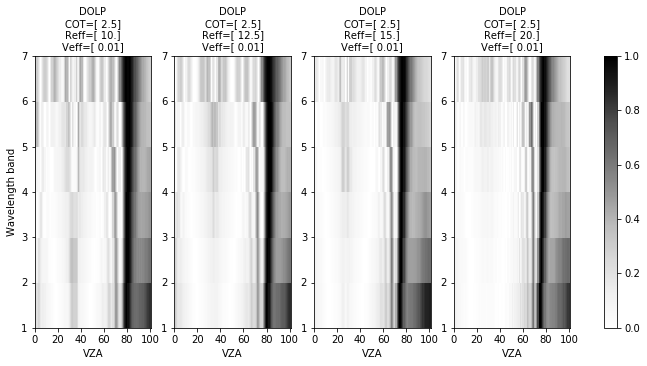

In [7]:
# plot dolp with case as title
#-------------------------------
# this is original LUT
# normalize:
#-----------
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
    
# normalize (0-1)
out_dolp_norm = out_dolp
for i in range(out_dolp.shape[2]):
    min_max_scaler         = MinMaxScaler().fit(out_dolp[:,:,i].T)
    out_dolp_norm[:,:,i]  = min_max_scaler.fit_transform(out_dolp[:,:,i].T).T
    

lam = np.array(range(out_dolp.shape[0]))
lam += 1
lam
vza = np.array(range(out_dolp.shape[1]))
vza += 1
vza
xx, yy = np.meshgrid(vza, lam)
fig, axes = plt.subplots(nrows=1, ncols=4,figsize=(12,5))
samp = np.array([0,100,1000,10000])
samp = np.array([200,300,400,500])
#samp[0]
i = -1
for ax in axes.flat:
    i+=1
    im = ax.pcolormesh(xx, yy, out_dolp_norm[:,:,samp[i]], cmap="Greys", vmin=0, vmax=1)
    axes[i].set_xticks([0,20,40,60,80,100])
    axes[i].set_xlabel('VZA')
    tit = 'DOLP' + '\nCOT=' + str(cod_df.values[samp[i]]) + '\nReff=' + str(ref_df.values[samp[i]]) + '\nVeff=' + str(vef_df.values[samp[i]])
    axes[i].set_title(tit, fontsize=10)
    
fig.colorbar(im, ax=axes.ravel().tolist())
axes[0].set_ylabel('Wavelength band')
plt.show()
# save figure
# as png
fi1 = '../../py_figs/oracles_NN/' + 'ro_090' + '_DOLP_norm_t_sample_greyscale_sameCOD.png'
#fig = matplotlib.pyplot.gcf()
#fig.set_size_inches(13, 9, forward=True)
fig.savefig(fi1, bbox_inches='tight',dpi=1000)

In [110]:
# upload measurement data for plotting
#------------------------------------
filepath = '..//..//py_data//oracles_NN//measurements//RSP2-ER2_L1B-RSPGEOL1B-GeolocatedRadiances_20160912T123215Z_V001-20160913T184158Z_NN.nc'
ref_q_meas = read_nc_file( nc_file=filepath, varname="ref_q" )
print ref_q_meas.shape
df_ref_q_meas, out_ref_q_meas = create_df_from_nc4CNN( ref_q_meas, colname="ref_q" )
utc = read_nc_file( nc_file=filepath, varname="utc_hour" )
utc_df, out = create_df_from_nc4CNN( utc, colname="UTC_hour" )
print utc_df.shape
print utc_df.head()

(152, 7, 3701)
(7, 101)
(3701, 1)
    UTC_hour
0  12.607610
1  12.607844
2  12.608078
3  12.608311
4  12.608545


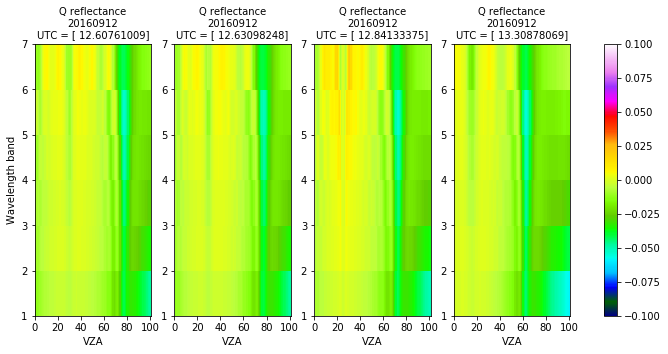

In [111]:
# plot ref_q with case as title
#-------------------------------

fig, axes = plt.subplots(nrows=1, ncols=4,figsize=(12,5))
samp = np.array([0,100,1000,3000])
#samp[0]
i = -1
for ax in axes.flat:
    i+=1
    im = ax.pcolormesh(xx, yy, out_ref_q_meas[:,:,samp[i]], cmap=plt.cm.gist_ncar, vmin=-0.1, vmax=0.1)
    axes[i].set_xticks([0,20,40,60,80,100])
    axes[i].set_xlabel('VZA')
    tit = 'Q reflectance' + '\n20160912' + '\nUTC = ' + str(utc_df.values[samp[i]])
    axes[i].set_title(tit, fontsize=10)
    
fig.colorbar(im, ax=axes.ravel().tolist())
axes[0].set_ylabel('Wavelength band')
plt.show()

In [34]:
out_ref_q_meas.shape

(7L, 101L, 3701L)

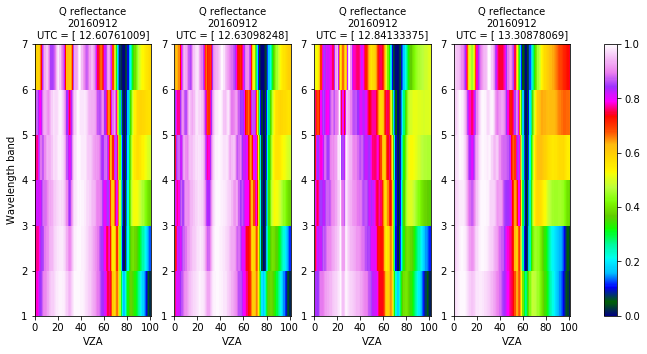

In [112]:
# plot ref_q with case as title
#-------------------------------
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
# standartize
#out_ref_q_std_meas = out_ref_q_meas
#for q in range(out_ref_q.shape[2]):
#    std_scale             = StandardScaler().fit(out_ref_q[:,:,q])
#    out_ref_q_std[:,:,q]  = std_scale.fit_transform(out_ref_q[:,:,q])
    
# normalize (0-1)
out_ref_q_norm_meas = out_ref_q_meas
for q in range(out_ref_q_meas.shape[2]):
    min_max_scaler         = MinMaxScaler().fit(out_ref_q_meas[:,:,q].T)
    out_ref_q_norm_meas[:,:,q]  = min_max_scaler.fit_transform(out_ref_q_meas[:,:,q].T).T

fig, axes = plt.subplots(nrows=1, ncols=4,figsize=(12,5))
samp = np.array([0,100,1000,3000])
#samp[0]
i = -1
for ax in axes.flat:
    i+=1
    im = ax.pcolormesh(xx, yy, out_ref_q_norm_meas[:,:,samp[i]], cmap=plt.cm.gist_ncar, vmin=0, vmax=1)
    axes[i].set_xticks([0,20,40,60,80,100])
    axes[i].set_xlabel('VZA')
    tit = 'Q reflectance' + '\n20160912' + '\nUTC = ' + str(utc_df.values[samp[i]])
    axes[i].set_title(tit, fontsize=10)
    
fig.colorbar(im, ax=axes.ravel().tolist())
axes[0].set_ylabel('Wavelength band')
plt.show()
# save figure
# as png
#fi1 = '../../py_figs/oracles_NN/' + 'no_noise' + '_Q_reflectance_0_1_normalized_sample.png'
fi1 = '../../py_figs/oracles_NN/' + '20160912' + '_Q_reflectance_norm_t.png'
#fig = matplotlib.pyplot.gcf()
#fig.set_size_inches(13, 9, forward=True)
fig.savefig(fi1, bbox_inches='tight',dpi=1000)